In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt


#Загрузка набора данных о винах
values = datasets.load_wine()
print(values.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np



X_train, X_test, y_train, y_test = train_test_split(values.data, values.target, test_size=0.30, random_state = 42)
preprocessing.scale(X_train, copy = False)
preprocessing.scale(X_test, copy = False)

array([[ 0.75571883,  0.80727587,  0.69235034, -1.43533615,  1.71600139,
         0.6406439 ,  0.98067672, -1.56407006,  0.13420104, -0.05855244,
         0.03168797,  1.09870053,  0.22622261],
       [ 1.53367955,  1.63510058,  0.26343732, -0.19547379,  1.26131996,
         0.91147978,  0.58855891, -0.47372529, -0.61046337, -0.00430532,
        -0.38453776,  1.0530622 ,  0.92572675],
       [-0.21331996,  0.55188314,  1.19274887,  0.50823187, -0.10272432,
        -1.45382029, -1.63000242,  1.45534622, -1.5185907 , -0.25229217,
        -0.8470108 , -0.49864101, -0.50304765],
       [ 0.87855473, -0.60178747,  1.19274887,  1.01087876,  0.3519571 ,
         1.18231567,  1.2076923 , -0.55759796,  1.44190439,  0.17393523,
         1.09537595,  0.10987005,  1.53593248],
       [-0.97763225, -0.89240678, -1.59518578,  0.03909476, -1.73957746,
        -0.42464392, -0.08216894, -0.72534331, -0.99187685, -0.22129382,
         0.77164482,  1.28125385, -0.77094285],
       [ 1.65651546, -0.231908

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np


val = pd.DataFrame(values.data, columns=values.feature_names)
target = pd.DataFrame(values.target, columns=["wine"])
data = pd.concat([val, target], axis = 1)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


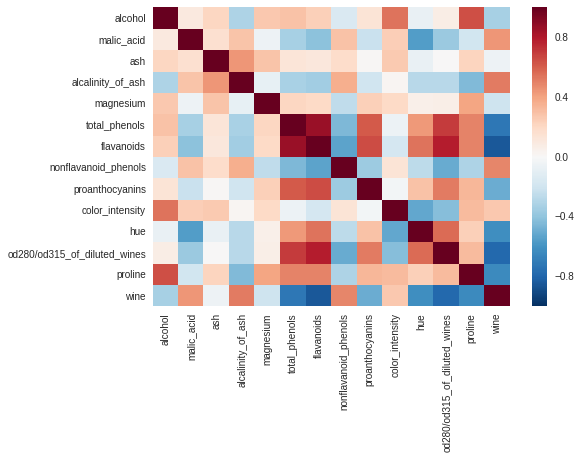

In [0]:
sns.heatmap(data.corr())

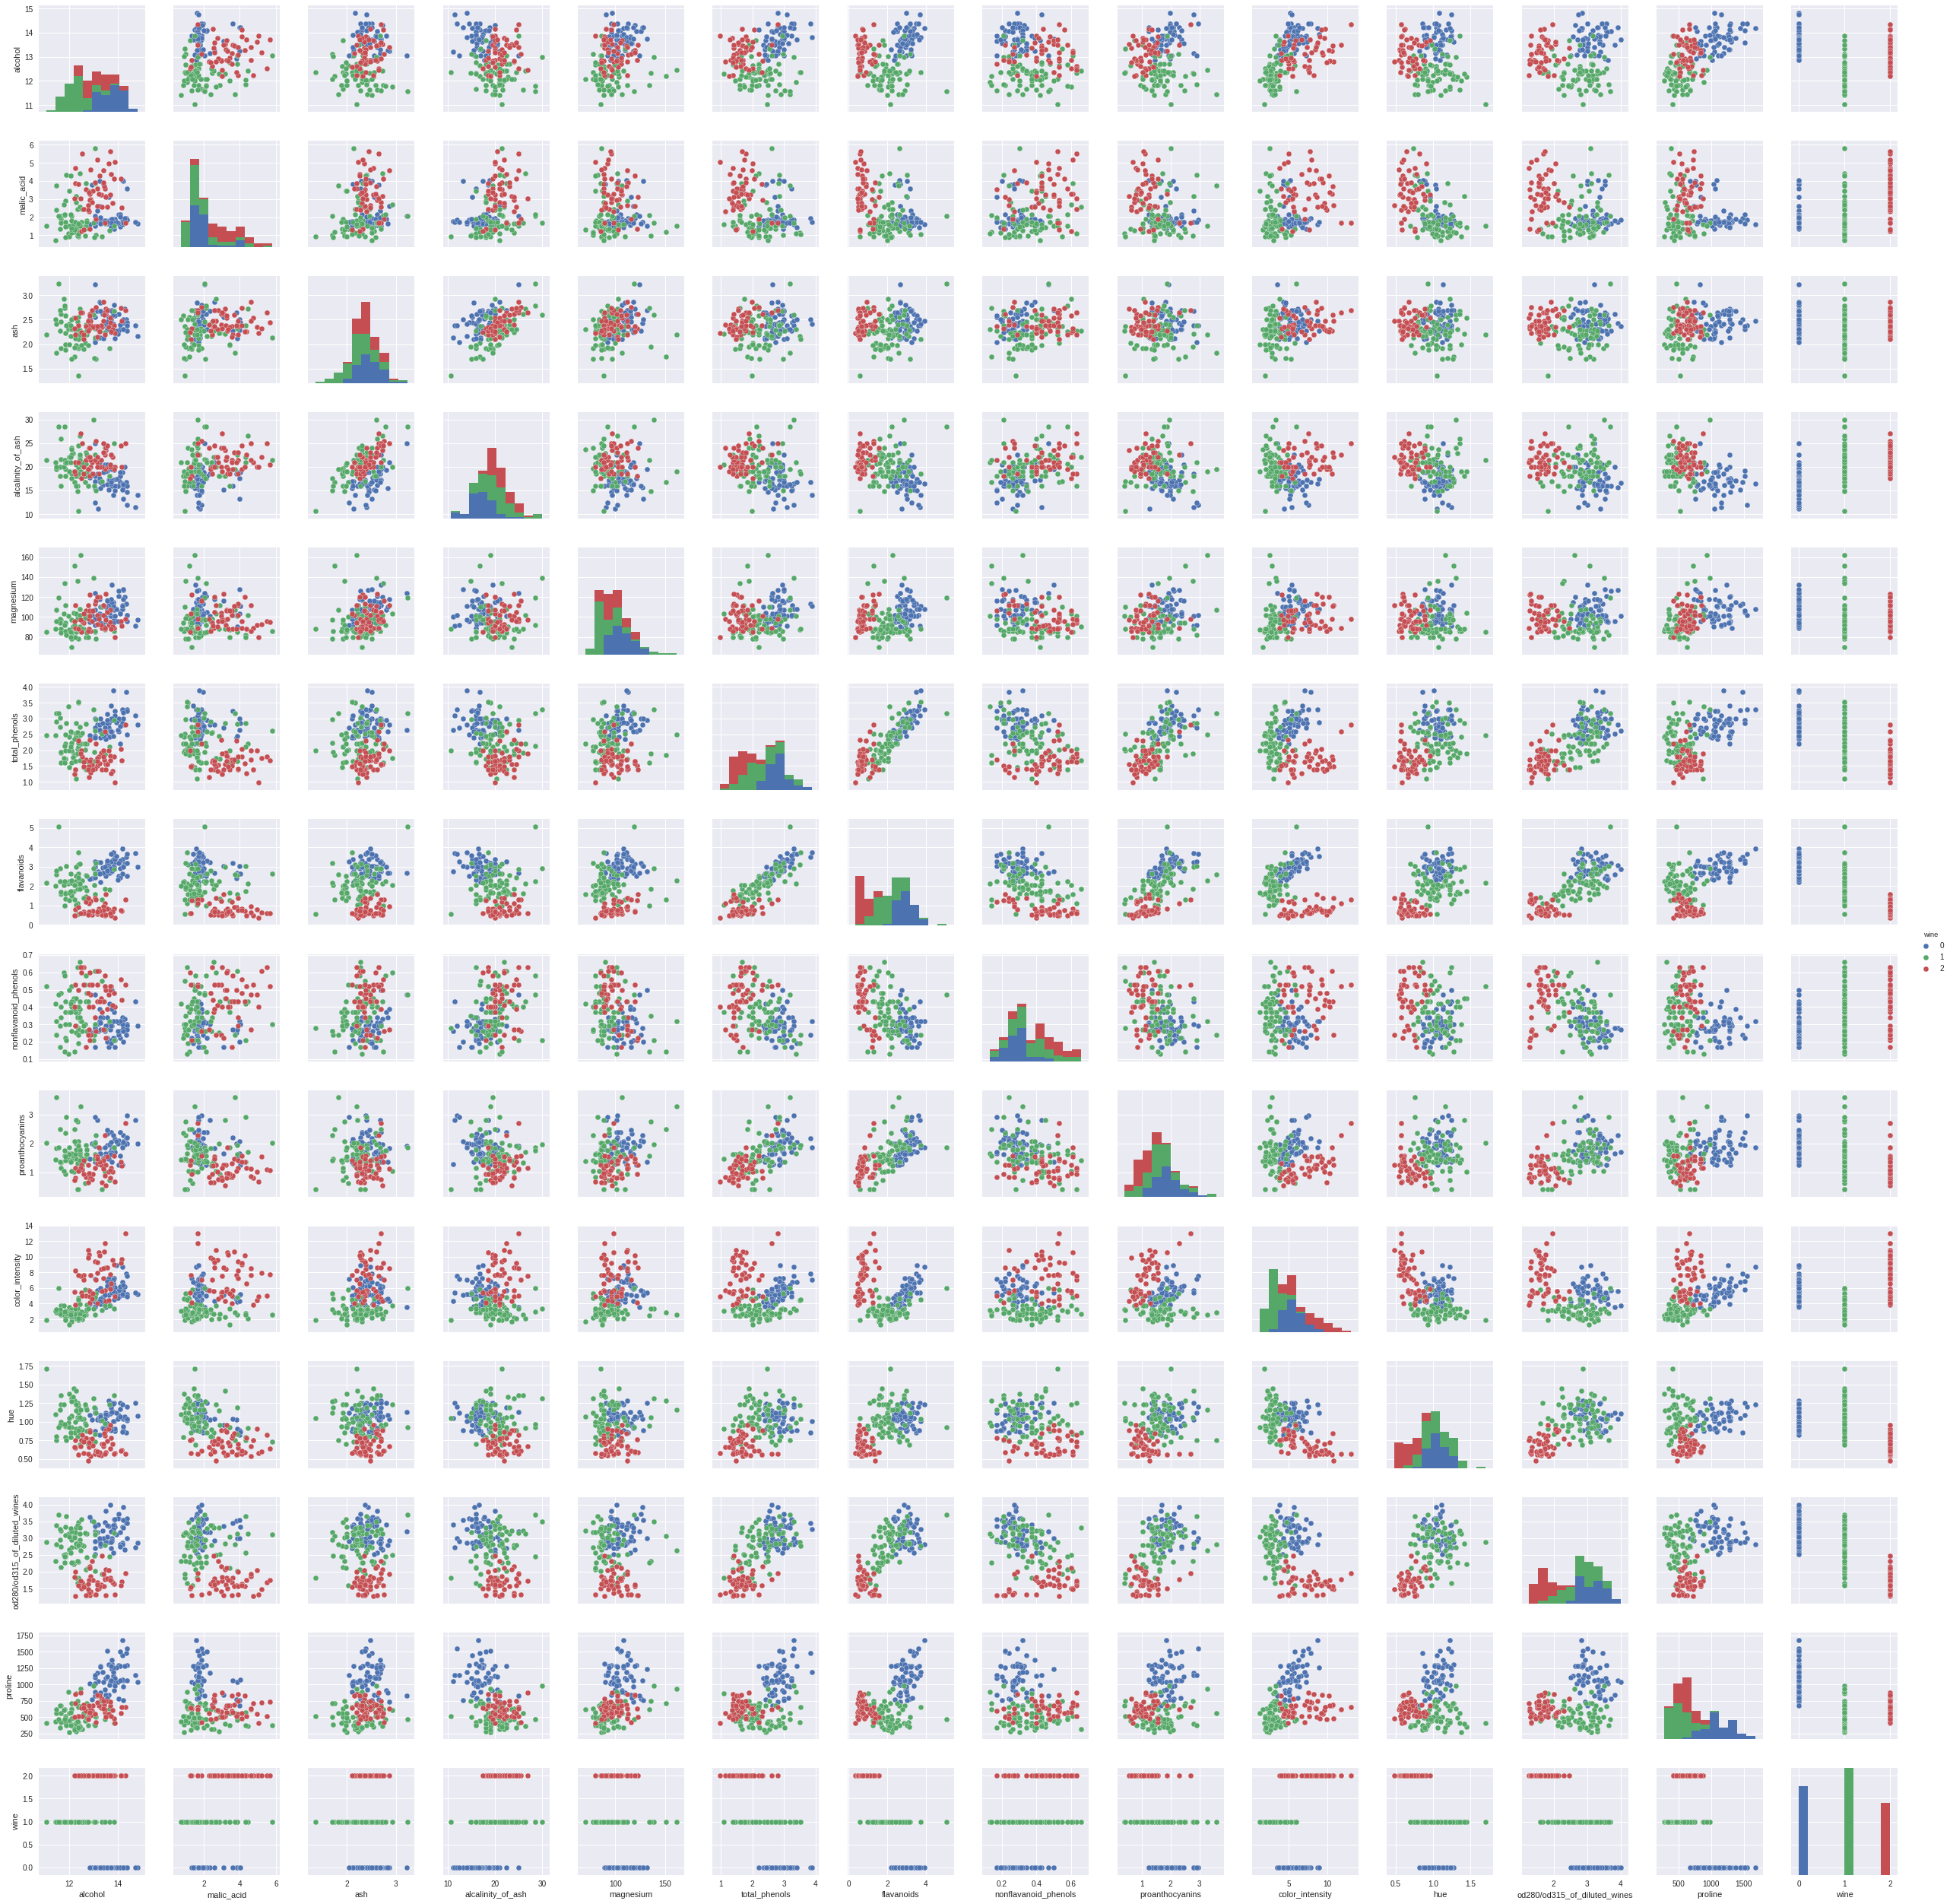

In [0]:
sns.pairplot(data, hue="wine")

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


L2regr = linear_model.SGDClassifier(random_state = 42, loss = "hinge", max_iter = 5, alpha = 1)
L2regr.fit(X_train, y_train)
y_pred = L2regr.predict(X_test)
print('Коэффициенты: \n', L2regr.coef_)
print("средняя МНК: %.2f" % mean_squared_error(y_test, y_pred))
print("Точность: %.2f" % accuracy_score(y_test, y_pred))

Коэффициенты: 
 [[ 0.2599779  -0.02866876  0.10479473 -0.20479356  0.05960976  0.12595697
   0.17287152 -0.05628906  0.01471715  0.05999376  0.0522861   0.14182525
   0.28623026]
 [-0.32723471 -0.12977475 -0.15818677  0.13981367 -0.07795816 -0.02015317
   0.03481761  0.0110416   0.0939277  -0.27803598  0.13696114  0.09891937
  -0.26698513]
 [ 0.08549011  0.14932839  0.06160198  0.05661338  0.02153451 -0.11637051
  -0.2183217   0.0544983  -0.15487548  0.25377195 -0.21367677 -0.24156647
  -0.00578443]]
средняя МНК: 0.00
Точность: 1.00


In [0]:
L1regr = linear_model.SGDClassifier(random_state = 42, loss = "hinge", max_iter = 5, penalty = "l1")
L1regr.fit(X_train, y_train)
y_pred = L1regr.predict(X_test)
print('Коэффициенты: \n', L1regr.coef_)
print("средняя МНК: %.2f" % mean_squared_error(y_test, y_pred))
print("Точность: %.2f" % accuracy_score(y_test, y_pred))

Коэффициенты: 
 [[ 29.82304088  24.81993942  48.54759684 -54.94750656  -1.36112096
    9.87587181  22.83596204   9.97489447   4.94589688   0.67506586
  -13.78701118  45.04042295  56.40533321]
 [-47.82429028   3.74627542 -51.32164409  23.14727874  -0.17922778
   -5.75611439  13.64685243   7.41137838  -2.05210691 -46.05127086
   25.66569087  14.50274928 -58.08620727]
 [  0.          -0.85508298  23.32973329   0.           1.56275697
   -7.7368698  -32.10302408  -8.70960275 -24.52735889  29.72073537
  -29.56195826  -8.56970805  -0.11927609]]
средняя МНК: 0.04
Точность: 0.96


In [0]:
regr = linear_model.SGDClassifier(random_state = 42, loss = "hinge", max_iter = 5, penalty = "None", alpha = 0.001)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Коэффициенты: \n', regr.coef_)
print("средняя МНК: %.2f" % mean_squared_error(y_test, y_pred))
print("Точность: %.2f" % accuracy_score(y_test, y_pred))

Коэффициенты: 
 [[ 14.6333921    5.8434511   13.86941235 -26.87595896   0.7856973
    4.66840753   8.60883899   1.72593949   5.59129746   1.3564896
    2.82460013  16.58485765  21.29881954]
 [-21.80328291  -2.93952342 -21.22069516  16.93146901   4.87980154
   -3.02618867   4.36762541   3.97866326   1.05964189 -20.88478567
    5.75473351   6.59364969 -27.04671398]
 [ -0.70955351   5.10099436   9.27768138   0.82277716  -6.02075098
   -3.92603089 -14.70385331  -3.19556937 -16.44950015  14.17643442
  -19.22312799  -4.83387235  -1.49702944]]
средняя МНК: 0.04
Точность: 0.96


In [0]:
import time
accuracy_list_L2 = []
time_list_L2 = []
accuracy_list_L1 = []
time_list_L1 = []
accuracy_list = []
time_list = []
n_iter_list = [10000, 30000, 50000, 80000, 100000, 300000, 500000, 800000, 1000000]
for n_iter in n_iter_list:
  L2reg = linear_model.SGDClassifier(max_iter = n_iter, random_state = 42)
  start_time = time.time()
  L2reg.fit(X_train, y_train)
  time_list_L2.append(time.time()-start_time)
  y_pred_L2 = L2reg.predict(X_test)
  accuracy_list_L2.append(accuracy_score(y_test, y_pred_L2))
  L1reg = linear_model.SGDClassifier(max_iter = n_iter, penalty = 'l1', random_state = 42)
  start_time = time.time()
  L1reg.fit(X_train, y_train)
  time_list_L1.append(time.time()-start_time)
  y_pred_L1 = L1reg.predict(X_test)
  accuracy_list_L1.append(accuracy_score(y_test, y_pred_L1))
  reg = linear_model.SGDClassifier(max_iter = n_iter, penalty = 'None', random_state = 42)
  start_time = time.time()
  reg.fit(X_train, y_train)
  time_list.append(time.time()-start_time)
  y_pred = reg.predict(X_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))
  print("*")

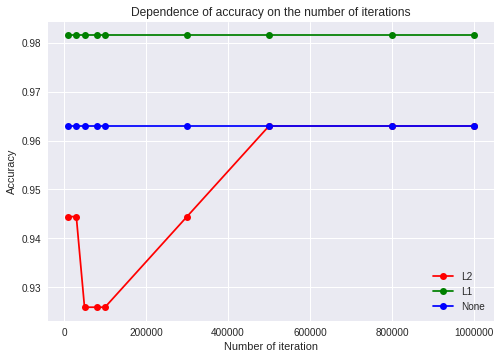

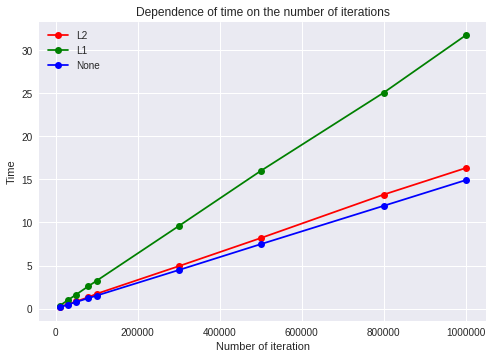

In [0]:
plt.figure()
plt.title("Dependence of accuracy on the number of iterations")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.plot(n_iter_list, accuracy_list_L2, 'o-', color="r", label="L2")
plt.plot(n_iter_list, accuracy_list_L1, 'o-', color="g", label="L1")
plt.plot(n_iter_list, accuracy_list, 'o-', color="b", label="None")
plt.legend(loc="best")
plt.show()
plt.figure()
plt.title("Dependence of time on the number of iterations")
plt.xlabel("Number of iteration")
plt.ylabel("Time")
plt.grid(True)
plt.plot(n_iter_list, time_list_L2, 'o-', color="r", label="L2")
plt.plot(n_iter_list, time_list_L1, 'o-', color="g", label="L1")
plt.plot(n_iter_list, time_list, 'o-', color="b", label="None")
plt.legend(loc="best")
plt.show()